In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 9
sns.set('paper', 'darkgrid')

In [3]:
from libnn import datasets
from libnn.losses import CategoricalCrossEntropy
from libnn.modules.activations import Softmax, Tanh, ReLU
from libnn.modules.layers import Linear
from libnn.modules.module import Sequential
from libnn.modules.normalization import BatchNormalization

from experiments import plotting

In [4]:
X, y = datasets.spirals(300)

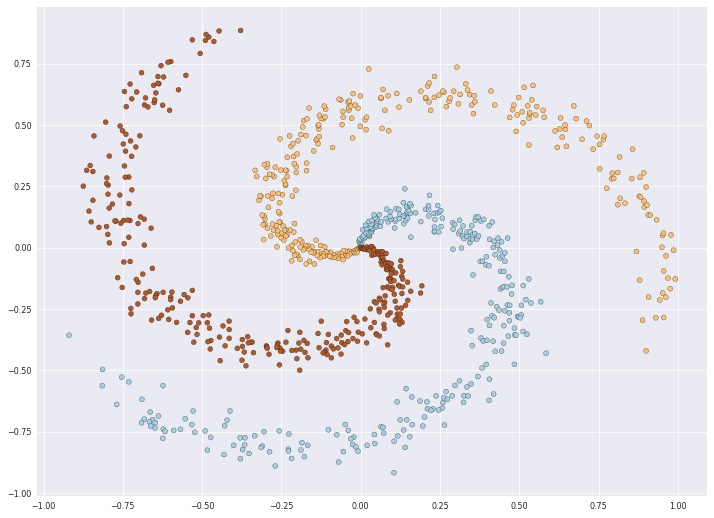

In [5]:
plotting.scatter(X, y)

In [6]:
def make_model(input_shape, output_shape, n_layers, hidden_size=10, initialization='xavier_relu', batch_norm=False):
    n_hidden_layers = n_layers - 2

    layers = []
    layers.append(Linear(input_shape, hidden_size, init=initialization))
    if batch_norm:
        layers.append(BatchNormalization(hidden_size))
    layers.append(ReLU())
    
    for i in range(n_hidden_layers):
        layers.append(Linear(hidden_size, hidden_size, init=initialization))
        if batch_norm:
            layers.append(BatchNormalization(hidden_size))
        layers.append(ReLU())
        
    layers.append(Linear(hidden_size, output_shape, init=initialization))
    layers.append(Softmax())
    
    return Sequential(*layers)

In [12]:
def get_losses(model, n_epochs=2000):
    loss = CategoricalCrossEntropy()
    losses = []

    learning_rate = 0.03
    for epoch in range(n_epochs):
        z = model(X)

        error = loss(z, y)
        losses.append(error)

        gradient = loss.gradient()
        gradient = model.backward(gradient)

        for parameter in model.trainable_parameters():
            parameter -= learning_rate * parameter.grad
    
    return losses

Training random normal
1.0986122886681096
Training xavier
0.08800935584968067
Training batch norm
0.009573260966351483
Training batch norm xavier
0.010308091362375984


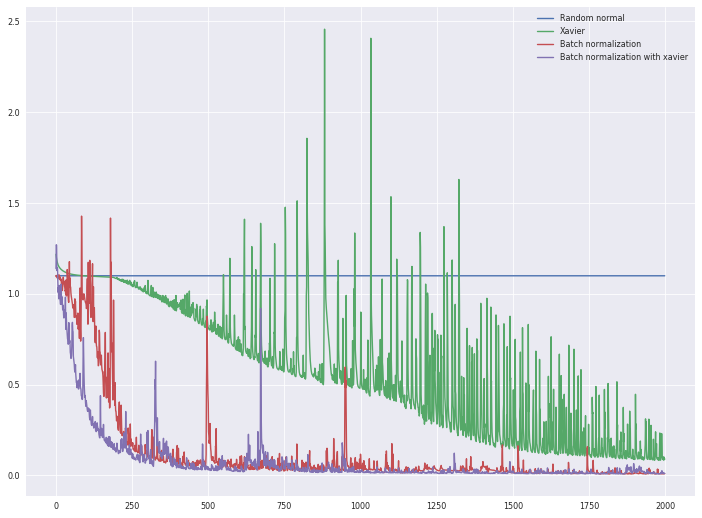

In [15]:
n_layers = 20
hidden_size = 10

print('Training random normal')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='random_normal', hidden_size=hidden_size)
random_losses = get_losses(model)
print(random_losses[-1])

print('Training xavier')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='xavier_relu', hidden_size=hidden_size)
xavier_losses = get_losses(model)
print(xavier_losses[-1])

print('Training batch norm')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='random_normal', hidden_size=hidden_size, batch_norm=True)
batch_norm_losses = get_losses(model)
print(batch_norm_losses[-1])

print('Training batch norm xavier')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='xavier_relu', hidden_size=hidden_size, batch_norm=True)
batch_norm_xavier_losses = get_losses(model)
print(batch_norm_xavier_losses[-1])

plt.plot(np.arange(len(random_losses)), random_losses, label='Random normal')
plt.plot(np.arange(len(xavier_losses)), xavier_losses, label='Xavier')
plt.plot(np.arange(len(batch_norm_losses)), batch_norm_losses, label='Batch normalization')
plt.plot(np.arange(len(batch_norm_xavier_losses)), batch_norm_xavier_losses, label='Batch normalization with xavier')
plt.legend()

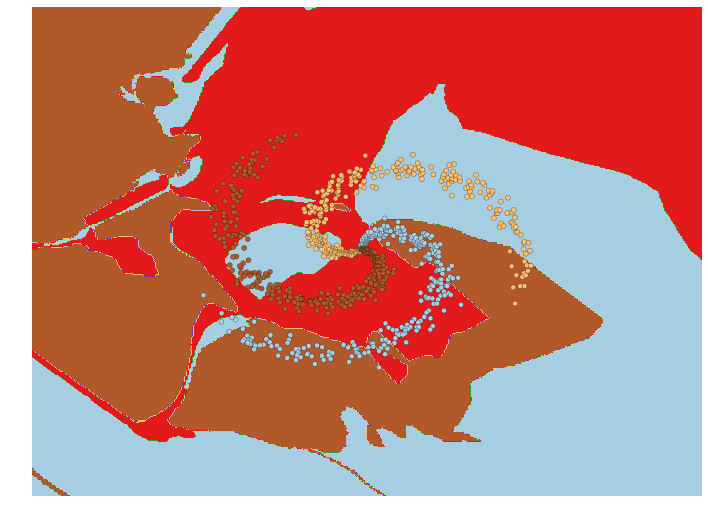

In [16]:
plotting.decision_boundary(X, y, model)